<center>
    <u><h2 style="color:blue;">OPTICAL CHARACTER RECOGNISION</h2></u>
    </center>
<H3 align="right">-BCA 5TH SEM</H3>  

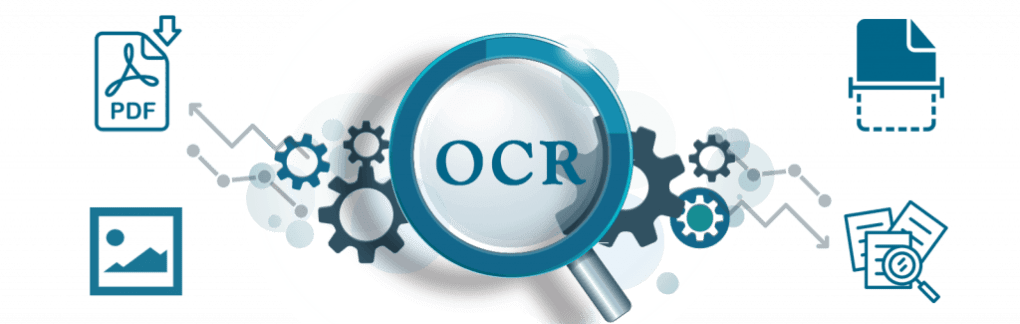

<u>
<h4>Let's get started...</h4>
</u>

<u>
<h4>Importing Modules</h4>
</u>

In [1]:
import os 
import cv2 
import PyPDF2 
from gtts import gTTS
from PIL import Image 
import pytesseract as pt 

In [2]:
pt.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe' 

In [3]:
test_img_path = r'C:\Users\shrey\Desktop\BCA\Project\5th sem\OCR\Optical Character Recognition With Python and Tesseract\test images'
create_path = lambda f : os.path.join(test_img_path, f) 

test_image_files = os.listdir(test_img_path)

for f in test_image_files:
    print(f)

abc-text.jpg
bound-text-1.jpg
bound-text-2.jpg
contact-1.jpg
hello-text.jpg
hindi-news-1.jpg
hindi-news-2.jpg
hindi-text-1.jpg
hindi-text-2.jpg
image-paths.txt
jap-text-1.png
jap-text-2.png
letter-1.png
magazine-1.jpg
news-1.png
news-2.jpg
portu-text-1.jpg
portu-text-2.jpg
selfie-circle.jpg
sin-text-1.gif
sin-text-2.gif
span-text-1.png
tam-text-1.png
test
test.pdf
test2.pdf
test3.pdf


In [5]:
def show_image(img_path, size=(500, 500)):
    image = cv2.imread(img_path)
    image = cv2.resize(image, size)
    
    cv2.imshow("IMAGE", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [5]:
avb_langs = pt.get_languages(config='')

for lang in avb_langs:
    print(lang) 

eng
hin
jpn
osd
por
sin
tam


<u>
<h4>Extract text from an image : Simple</h4>
</u>

In [7]:
image_path = test_image_files[14] 
path = create_path(image_path)
image = Image.open(path)
text = pt.image_to_string(image)

print(text)
show_image(path)

TITANIC SINKING; NO LIVES LOST

PASSENGERS NE ; rw SSC|SSSt*~«SS*«S
4 x ni




In [13]:
path = create_path("tam-text-1.png") 

image = Image.open(path)
text = pt.image_to_string(image, lang='tam')

print(text)
show_image(path)

ழு வயதனடந்த ஆண்களும்
கிபண்களும், இனம், (தேசிய இனம்
அல்லது சமயம் என்பன கஈரணமஈன
கட்டூப்பாகிடதுவுமின்றித் திருமணம்
செய்வதற்கும் ஒரு குடும்பத்தை
உருவஈக்குவதற்கும் உரினம உனடயவராவர்.
திருமண வஈழ்விலும், திருமணம்
குனலக்கப்படூம் எபாழுதும் அவர்கள் சமமஈக



<u>
    <h4>Extract text from an image : Timeout extraction</h4>
</u>

In [15]:
path = create_path("news-2.jpg") 
image = Image.open(path)
text = 'NO TEXT TO BE APPEARED'
try:
    text = pt.image_to_string(image, lang='eng', timeout=2) 
except RuntimeError as timeout_error:
    print("[TIMEOUT ERROR]")
print(text)
show_image(path)

ar

he

DNHONtAd HON

ISSUE NO.9.164
Fs

60

MONDAY 22 FEBRUARY 2016 ‘WWW.INDEPENDENT.CO.UK

The hypocrisy of ‘no platform’ fury voce:ns»

Robert Fisk Matthew Norman
‘The Raqqa teacher ‘You may not like her, but
evicted by her students | the world needs Hillary
VoIcEs P.20 VOICES .20
Virginia Ironside Ben Chu
Group therapy is nothing | Help to Buy has barely : -

Our failed Utopias to be frightened of helped at all Lena Dunham at 30
Better worlds gone wrong sicreao DILEMMAS P.37 BUSINESS P53 On life after ‘Girls’ artspso

N

‘After days of speculation, Boris Johnson announced yesterday that he will be ‘advocating Vote Leave ... because I want a better deal’ gpa

Out for himse

Boris Johnson confirms he will back Brexit — putting him in line for No 10 if UK votes to leave
Downing Street fears up to 150 Tory MPs could defy PM by campaigning against his EU deal

country out ofthe European Vote Leave”.Butsignificantly istovotetogo;because all EU of the “leave” campaign and
Unionbybecomingt

<u>
    <h4>Get bounding box estimates</h4>
</u>

In [16]:
path = create_path("bound-text-2.jpg") 

image = Image.open(path)
bound_rects = pt.image_to_boxes(image, lang='eng') 

print(bound_rects)
show_image(path) 

W 123 486 200 545 0
E 171 486 217 545 0
A 206 487 240 529 0
K 243 487 329 529 0
p 351 479 380 514 0
r 385 479 414 514 0
o 419 479 451 515 0
p 456 479 483 514 0
e 488 479 550 514 0
R 179 418 217 460 0
E 222 419 257 460 0
V 260 418 302 460 0
E 306 419 340 460 0
N 346 419 389 460 0
G 375 411 413 460 0
E 394 418 433 460 0
. 439 411 491 460 0
S 95 350 138 410 0
T 146 351 180 392 0
R 185 351 222 392 0
O 228 350 264 392 0
N 271 351 313 392 0
G 319 350 357 392 0
p 382 344 409 377 0
E 416 344 444 377 0
o 450 343 480 378 0
P 488 344 514 377 0
L 519 344 548 377 0
E 552 343 580 377 0
F 190 284 223 324 0
O 229 283 266 324 0
R 273 283 309 324 0
G 315 283 354 324 0
I 359 284 377 323 0
V 381 283 421 323 0
E 404 282 436 324 0
. 426 282 480 323 0
I 11 215 38 273 0
N 45 215 87 256 0
T 91 215 126 256 0
E 133 215 166 256 0
L 173 215 207 256 0
L 211 215 245 256 0
I 250 215 267 256 0
G 275 214 313 256 0
E 320 215 354 256 0
N 360 215 402 256 0
T 406 215 441 256 0
p 466 207 492 241 0
r 500 207 527 241 0
o 533 

In [17]:
img = cv2.imread(path)
h, _, _ = img.shape

for b in bound_rects.splitlines():
    b = b.strip().split(' ') 
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2) 

cv2.imshow("CHARACTERIZED IMAGE", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

<u>
    <h4>Get verbose data including boxes, confidences, line and page numbers</h4>
</u>

In [18]:
image_path = test_image_files[2]
path = create_path(image_path) 
image = Image.open(path)
text = pt.image_to_data(image)
print(text)
show_image(path)

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	674	674	-1	
2	1	1	0	0	0	11	129	653	406	-1	
3	1	1	1	0	0	11	129	653	406	-1	
4	1	1	1	1	0	123	129	427	66	-1	
5	1	1	1	1	1	123	129	206	59	95.682785	WEAK
5	1	1	1	1	2	351	159	199	36	0.000000	prope
4	1	1	1	2	0	179	214	312	49	-1	
5	1	1	1	2	1	179	214	312	49	94.726707	REVENGE.
4	1	1	1	3	0	95	264	485	67	-1	
5	1	1	1	3	1	95	264	262	60	93.304192	STRONG
5	1	1	1	3	2	382	296	198	35	49.721970	pEoPLE
4	1	1	1	4	0	190	350	290	42	-1	
5	1	1	1	4	1	190	350	290	42	96.412842	FORGIVE.
4	1	1	1	5	0	11	401	653	66	-1	
5	1	1	1	5	1	11	401	430	59	93.241913	INTELLIGENT
5	1	1	1	5	2	466	433	198	34	19.838326	propLe
4	1	1	1	6	0	208	485	255	50	-1	
5	1	1	1	6	1	208	485	255	50	96.290016	IGNORE.
2	1	2	0	0	0	323	647	351	27	-1	
3	1	2	1	0	0	323	647	351	27	-1	
4	1	2	1	1	0	323	647	351	27	-1	
5	1	2	1	1	1	323	647	351	27	95.000000	 



<u>
    <h4>Get information about orientation and script detection</h4>
</u>

In [19]:
image_path = "news-2.jpg" 
path = create_path(image_path)

print(pt.image_to_osd(path, lang='eng'))

Page number: 0
Orientation in degrees: 270
Rotate: 90
Orientation confidence: 250.00
Script: Latin
Script confidence: 2.00



<u>
    <h4>Convert in to different file formats (PDF, XML, HOCR)</h4>
</u>

In [20]:
image_path = "news-1.png"
path = create_path(image_path)
file_save_path = r'C:\Users\shrey\Desktop\BCA\Project\5th sem\OCR\Optical Character Recognition With Python and Tesseract\files'

In [21]:
pdf = pt.image_to_pdf_or_hocr(path, extension='pdf')
file = open(os.path.join(file_save_path, "pdf-content.pdf"), 'w+b')
file.write(pdf)
file.close()

In [22]:
hocr = pt.image_to_pdf_or_hocr(path, extension='hocr')
file = open(os.path.join(file_save_path, "hocr-content.html"), 'w+b')
file.write(hocr)
file.close()

In [23]:
xml = pt.image_to_alto_xml(path)
file = open(os.path.join(file_save_path, "xml-content.xml"), 'w+b')
file.write(xml)
file.close()

<h4><u>Extract text from pdf</u></h4>

In [24]:
pdfFileObj = open(r'C:\Users\shrey\Desktop\BCA\Project\5th sem\OCR\report\report_ijamec.pdf', 'rb') 
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)  
print(pdfReader.numPages) 
pageObj = pdfReader.getPage(0) 
print(pageObj.extractText()) 
pdfFileObj.close() 

7
See discussions, st ats, and author pr ofiles f or this public ation at : https://www .researchgate.ne t/public ation/311851325
A Detailed Analysis of Optical Character Recognition Technology
Article    in  International Journal of Applied Mathematics Electr onics and Comput ers · Dec ember 2016
DOI: 10.18100/ ijamec.270374
CITATIONS
63READS
22,758
2 author s:
Some o f the author s of this public ation ar e also w orking on these r elat ed pr ojects:
A De tailed Analysis of Optic al Char acter R ecognition T echnolog y View pr oject
Karez Hamad
Soran Univ ersity
1 PUBLICA TION    63 CITATIONS    
SEE PROFILE
Mehme t Kay a
Adiy aman Univ ersity
10 PUBLICA TIONS    98 CITATIONS    
SEE PROFILE
All c ontent f ollo wing this p age was uplo aded b y Karez Hamad  on 27 Dec ember 2016.
The user has r equest ed enhanc ement of the do wnlo aded file.


<h4><u>Extract text from multiple images in a folder</h4></u>

In [25]:
path_to_images = r'C:/Users/shrey/Desktop/BCA/Project/5th sem/OCR/Optical Character Recognition With Python and Tesseract/test images/test/' #Define path to image
pt.tesseract_cmd = pt.pytesseract.tesseract_cmd 
for root, dirs, file_names in os.walk(path_to_images):
    for file_name in file_names: 
        img = Image.open(path_to_images + file_name) 
        text = pt.image_to_string(img) 
        print(text)

The best rev is
gust moving rand
ting over it.
Dre ie someone
the satisfaction of
watching you suffer.

ing Pictures @ MastPhotos.com

WEAK prope
REVENGE.
STRONG pEoPLE
FORGIVE.
INTELLIGENT propLe
IGNORE.




<h4><u>Converting image text to audio</h4></u>

In [26]:
img = cv2.imread(r'C:\Users\shrey\Desktop\BCA\Project\5th sem\OCR\Optical Character Recognition With Python and Tesseract\test images\letter-1.png')

img = cv2.resize(img, (600, 360))
hImg, wImg, _ = img.shape

boxes = pt.image_to_boxes(img)
xy = pt.image_to_string(img)
for b in boxes.splitlines():
  b = b.split(' ')

x, y, w, h = int(b[1]), int(b[2]), int(b[3]), int(b[4])
cv2.rectangle(img, (x, hImg - y), (w, hImg - h), (50, 50, 255), 1)
cv2.putText(img, b[0], (x, hImg - y + 13), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (50, 205, 50), 1)

cv2.imshow('Detected text', img)

audio = gTTS(text = xy, lang = 'en', slow = False)
audio.save("saved_audio.wav")
os.system("saved_audio.wav")

0

<center><h1><b>BCA(5th SEM)<b></h1>
    <H3>By- Nandini Garg(ENG20CA0023)</H3>
    <H3><pre>   Shreya Jaiswal(ENG20CA0042)</pre></H3></center>

<u>

<u></u>